In [ ]:
# !pip install --upgrade scikit-learn==1.3.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv('/content/Preprocessed_dataset_Mobile.csv')

In [ ]:
df.head()

,mobile_price,mobile_color,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,ram,battery_power,...,res_dim_2,p_cam_max,p_cam_count,f_cam_max,f_cam_count,2G,3G,4G,4GVOLTE,5G
0,8999,Other,Dual Sim,6.52,Android 10,8,2.0,32,3,5000,...,720,12,3,5,1,1,1,1,1,0
1,8999,Blue,Dual Sim,6.52,Android 10,8,2.0,32,3,5000,...,720,12,3,5,1,1,1,1,1,0
2,9999,Blue,Dual Sim,6.52,Android 10,8,2.0,64,4,5000,...,720,12,3,5,1,1,1,1,1,0
3,9999,Other,Dual Sim,6.52,Android 10,8,2.0,64,4,5000,...,720,12,3,5,1,1,1,1,1,0
4,11999,Other,Dual Sim,6.50,Android 10,8,2.0,128,4,5000,...,720,48,4,16,1,1,1,1,1,0


In [ ]:
df.drop('dual_sim',axis=1,inplace=True)

In [ ]:
df.head()

,mobile_price,mobile_color,disp_size,os,num_cores,mp_speed,int_memory,ram,battery_power,mob_width,...,res_dim_2,p_cam_max,p_cam_count,f_cam_max,f_cam_count,2G,3G,4G,4GVOLTE,5G
0,8999,Other,6.52,Android 10,8,2.0,32,3,5000,75.0,...,720,12,3,5,1,1,1,1,1,0
1,8999,Blue,6.52,Android 10,8,2.0,32,3,5000,75.0,...,720,12,3,5,1,1,1,1,1,0
2,9999,Blue,6.52,Android 10,8,2.0,64,4,5000,75.0,...,720,12,3,5,1,1,1,1,1,0
3,9999,Other,6.52,Android 10,8,2.0,64,4,5000,75.0,...,720,12,3,5,1,1,1,1,1,0
4,11999,Other,6.50,Android 10,8,2.0,128,4,5000,75.4,...,720,48,4,16,1,1,1,1,1,0


In [ ]:
df.columns

Index(['mobile_price', 'mobile_color', 'disp_size', 'os', 'num_cores',
       'mp_speed', 'int_memory', 'ram', 'battery_power', 'mob_width',
       'mob_height', 'mob_depth', 'mob_weight', 'res_dim_1', 'res_dim_2',
       'p_cam_max', 'p_cam_count', 'f_cam_max', 'f_cam_count', '2G', '3G',
       '4G', '4GVOLTE', '5G'],
      dtype='object')

In [ ]:
# df['ppi'] = (((df['res_dim_1']**2) + (df['res_dim_2']**2))**0.5/df['disp_size']).astype('float')

In [ ]:
df.corr()['mobile_price']

<ipython-input-118-f1a7ef7ca649>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mobile_price']


mobile_price     1.000000
disp_size        0.366649
num_cores        0.122706
mp_speed         0.606659
int_memory       0.763881
ram              0.768121
battery_power   -0.012244
mob_width        0.095643
mob_height       0.087446
mob_depth       -0.118081
mob_weight       0.386041
res_dim_1        0.409634
res_dim_2        0.230158
p_cam_max        0.424421
p_cam_count      0.344360
f_cam_max        0.485887
f_cam_count      0.261053
2G              -0.055807
3G              -0.173111
4G               0.048526
4GVOLTE          0.051959
5G               0.454555
Name: mobile_price, dtype: float64

In [ ]:
# df.drop(columns=['disp_size','res_dim_1','res_dim_2'],inplace=True)

<ipython-input-120-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

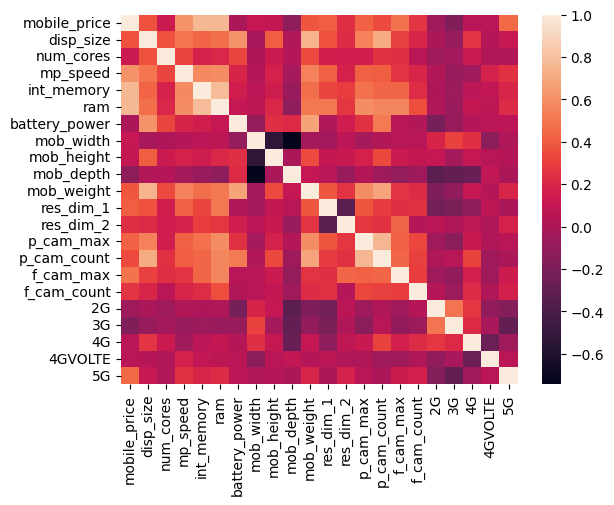

In [ ]:
sns.heatmap(df.corr())

<ipython-input-121-910c674892b5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['mobile_price']))


<Axes: xlabel='mobile_price', ylabel='Density'>

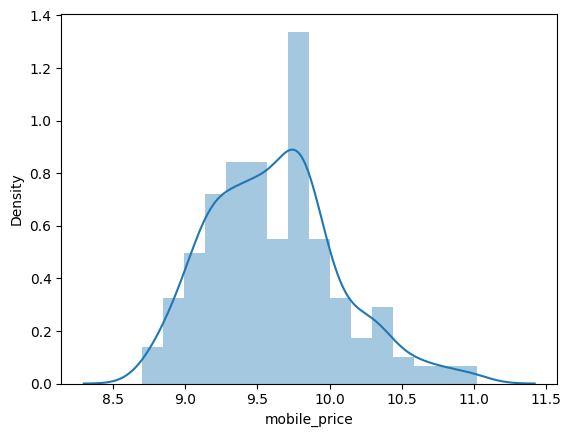

In [ ]:
sns.distplot(np.log(df['mobile_price']))

In [ ]:
# pt = PowerTransformer()
# X_transformed2 = pt.fit_transform(np.array(df['mobile_price']).reshape(-1, 1))

In [ ]:
# sns.distplot(X_transformed2)

In [ ]:
# type(pd.DataFrame(X_transformed2))

In [ ]:
# # plt.figure(figsize=(14,4))

# plt.subplot(121)
# stats.probplot(np.log(df['mobile_price']), dist="norm", plot=plt)
# plt.title('Fare Before Log')

# plt.subplot(122)
# stats.probplot(X_transformed2.ravel(), dist="norm", plot=plt)
# plt.title('Fare After Log')

# plt.show()

In [ ]:
# pd.Series(X_transformed2.ravel())

In [ ]:
X = df.drop(columns=['mobile_price'])
# y = pd.Series(X_transformed2.ravel())
y = df['mobile_price']

In [ ]:
X.head(3)

,mobile_color,disp_size,os,num_cores,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,...,res_dim_2,p_cam_max,p_cam_count,f_cam_max,f_cam_count,2G,3G,4G,4GVOLTE,5G
0,Other,6.52,Android 10,8,2.0,32,3,5000,75.0,164.4,...,720,12,3,5,1,1,1,1,1,0
1,Blue,6.52,Android 10,8,2.0,32,3,5000,75.0,164.4,...,720,12,3,5,1,1,1,1,1,0
2,Blue,6.52,Android 10,8,2.0,64,4,5000,75.0,164.4,...,720,12,3,5,1,1,1,1,1,0


In [ ]:
X.columns

Index(['mobile_color', 'disp_size', 'os', 'num_cores', 'mp_speed',
       'int_memory', 'ram', 'battery_power', 'mob_width', 'mob_height',
       'mob_depth', 'mob_weight', 'res_dim_1', 'res_dim_2', 'p_cam_max',
       'p_cam_count', 'f_cam_max', 'f_cam_count', '2G', '3G', '4G', '4GVOLTE',
       '5G'],
      dtype='object')

In [ ]:
# Reverse the transformation to get the original values
# original_price_values = pt.inverse_transform(y.values.reshape(-1, 1))


In [ ]:
import sklearn
print(sklearn.__version__)

1.3.0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [ ]:
# RandomForestRegressor(n_estimators=150,
#                               # random_state=3,
#                               # max_samples=0.5,
#                               max_features='sqrt',
#                               max_depth=10,
#                               bootstrap=False,
#                               min_samples_leaf=1,
#                               min_samples_split=2)

In [ ]:
X_train.head(2)

,mobile_color,disp_size,os,num_cores,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,...,res_dim_2,p_cam_max,p_cam_count,f_cam_max,f_cam_count,2G,3G,4G,4GVOLTE,5G
175,Blue,6.38,Android Pie 9,8,2.3,128,8,4500,75.23,159.53,...,1080,48,3,32,1,1,1,1,0,0
375,Red,6.20,Android Oreo 8.1,8,1.8,64,4,4230,75.60,156.20,...,720,13,2,8,1,1,1,1,0,0


In [ ]:
X_train.columns

Index(['mobile_color', 'disp_size', 'os', 'num_cores', 'mp_speed',
       'int_memory', 'ram', 'battery_power', 'mob_width', 'mob_height',
       'mob_depth', 'mob_weight', 'res_dim_1', 'res_dim_2', 'p_cam_max',
       'p_cam_count', 'f_cam_max', 'f_cam_count', '2G', '3G', '4G', '4GVOLTE',
       '5G'],
      dtype='object')

In [ ]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False),[0,2]) # change cols after selecting cols
],remainder='passthrough')

step2 = ExtraTreesRegressor(max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=50)
step3 = StandardScaler()

pipe = Pipeline([
    ('step1',step1),
    # ('step3',step3),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
# model = pipe.named_steps['step2']
# feature_importances = model.feature_importances_

# # Print feature importances
# print("Feature Importances:")
# l = []
# for feature_name, importance in zip(X_train.columns, feature_importances):
#   l.append(f"{feature_name}: {importance:.4f}")
# return l



y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
scores = cross_val_score(pipe, X, y, cv=10)
print('cross_val_score: ',scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.9492679338235108
MAE 1015.2634426229508


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

cross_val_score:  0.7692063515940017


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import pandas as pd
print(pd.__version__)


1.5.3


In [ ]:
# import pickle

# pickle.dump(X_train,open('X_train.pkl','wb'))
# pickle.dump(pipe,open('pipe8.pkl','wb'))